In [11]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics as sg


import matplotlib.pylab as plt

import seaborn as sns
sns.set_theme()

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage


import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
df = pd.read_csv('../data/nts.csv', index_col=0, parse_dates=True)
df.shape, df.columns

((42, 15),
 Index(['rynek', 'inflacja_r', 'inflacja_q', 'stopa_procentowa',
        'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
        'bezrobocie', 'spr_detaliczna', 'pkb', 'wynag', 'inflacja_q_kum',
        'ogolem', 'rpk'],
       dtype='object'))

In [20]:
predictors = ['inflacja_r', 'inflacja_q', 'stopa_procentowa',
        'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
        'bezrobocie', 'spr_detaliczna', 'pkb', 'wynag', 'inflacja_q_kum',
        'ogolem', 'rpk']
outcome = 'rynek'

model = LinearRegression()

bn = 37
model.fit(X=df[predictors].iloc[:bn], y=df[outcome].iloc[:bn])

print(f'Wyraz wolny: {model.intercept_:.3f}')
print('Współczynniki:')
for name, coef in zip(predictors, model.coef_):
    print(f' {name}: {coef}')

Wyraz wolny: 9241.832
Współczynniki:
 inflacja_r: -27.007597094080783
 inflacja_q: -38.893426250826906
 stopa_procentowa: 13377.093887206072
 liczba_kredytow: 0.01731614343817256
 tempo_wzrostu: -59.27660706477059
 ufnosc: -23.08856390632795
 duze_zakupy: -4.037395044947253
 bezrobocie: 6.33587746349118
 spr_detaliczna: 16.144534333623447
 pkb: 8.85640126139158
 wynag: 2.4084176822627157
 inflacja_q_kum: -4034.808805515178
 ogolem: -0.004609262250147239
 rpk: 0.0


In [27]:
preds = model.predict(df[predictors].iloc[bn:])
RMSE = np.sqrt(mean_squared_error(df[outcome].iloc[bn:], preds))
r2 = r2_score(df[outcome].iloc[bn:], preds)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 517
r2: 0.8229


In [39]:
preds, df.index[bn:]

(array([12188.64894668, 12865.73931734, 13658.13377819, 14227.55739409,
        14415.16922223]),
 DatetimeIndex(['2023-06-30', '2023-09-30', '2023-12-31', '2024-03-31',
                '2024-06-30'],
               dtype='datetime64[ns]', freq=None))

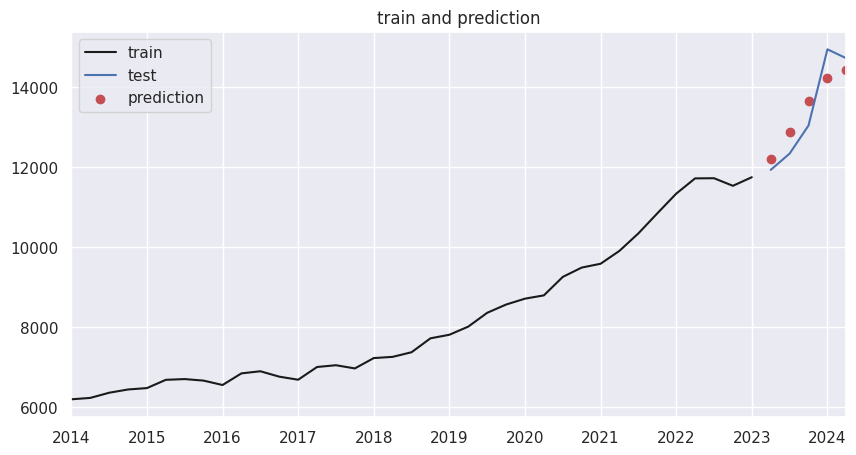

In [46]:

fig = plt.Figure()
ax = fig.gca()
df['rynek'].iloc[:bn].plot(style='k', figsize=(10,5), label = 'train', ax=ax)
df['rynek'].iloc[bn:].plot(style='b', figsize=(10,5), label = 'test', ax=ax)
ax.scatter(x=df.index[bn:], y=preds, c='r',   label = 'prediction')
ax.set_title('train and prediction')
ax.legend()
fig.savefig('../images/lr_output.png')
display(fig)

In [41]:
model = sm.OLS(df[outcome], df[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  rynek   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     518.8
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           4.78e-29
Time:                        11:35:32   Log-Likelihood:                -269.30
No. Observations:                  42   AIC:                             568.6
Df Residuals:                      27   BIC:                             594.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
inflacja_r         -42.8063     38.334  